# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...


In [ ]:
df.shape

(1000, 1)

In [ ]:
import os
directory = "/Users/vamshisamudrala/Desktop/My Projects"
file_path = os.path.join(directory, "scraped_data.csv")
os.makedirs(directory, exist_ok=True)
df.to_csv(file_path, index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
import os

if os.path.exists(file_path):
    print(f"File exists at: {file_path}")
else:
    print("File was not created.")

File exists at: /Users/vamshisamudrala/Desktop/My Projects/scraped_data.csv


In [ ]:
data = pd.read_csv('/Users/vamshisamudrala/Desktop/My Projects/scraped_data.csv')

In [ ]:
data.head()

,reviews
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...


In [ ]:
data['reviews'] = data['reviews'].str.lower()

In [ ]:
!pip install nltk
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
def split_data(data):
   parts = re.split(r"\s*\|\s*", data, maxsplit=1)
   tag = parts[0]
   review = parts[1] if len(parts) > 1 else ""
   return pd.Series([tag, review])

In [ ]:
data[["tag", "review"]] = data["reviews"].apply(split_data)

In [ ]:
data

,reviews,tag,review
0,✅ trip verified | london heathrow to male in...,✅ trip verified,london heathrow to male in new business class....
1,not verified | very good flight following an ...,not verified,very good flight following an equally good fli...
2,not verified | an hour's delay due to late ar...,not verified,an hour's delay due to late arrival of the inc...
3,✅ trip verified | i booked through ba becaus...,✅ trip verified,i booked through ba because loganair don’t hav...
4,✅ trip verified | british airways lost bags ...,✅ trip verified,british airways lost bags in lhr then found th...
...,...,...,...
995,✅ trip verified | london to shanghai. the con...,✅ trip verified,london to shanghai. the concorde room in heath...
996,not verified | i have often flown british air...,not verified,i have often flown british airways and have co...
997,not verified | good morning. i would like to ...,not verified,good morning. i would like to write a review f...
998,✅ trip verified | my flight was cancelled 3 da...,✅ trip verified,my flight was cancelled 3 days in a row. was f...


In [ ]:
data.drop(columns=["reviews"], inplace=True)

In [ ]:
data

,tag,review
0,✅ trip verified,london heathrow to male in new business class....
1,not verified,very good flight following an equally good fli...
2,not verified,an hour's delay due to late arrival of the inc...
3,✅ trip verified,i booked through ba because loganair don’t hav...
4,✅ trip verified,british airways lost bags in lhr then found th...
...,...,...
995,✅ trip verified,london to shanghai. the concorde room in heath...
996,not verified,i have often flown british airways and have co...
997,not verified,good morning. i would like to write a review f...
998,✅ trip verified,my flight was cancelled 3 days in a row. was f...


In [ ]:
def remove_punctuation(data):
    return re.sub(r'[^\w\s]', '', data)

In [ ]:
data["review"] = data["review"].apply(remove_punctuation)

In [ ]:
data

,tag,review
0,✅ trip verified,london heathrow to male in new business class ...
1,not verified,very good flight following an equally good fli...
2,not verified,an hours delay due to late arrival of the inco...
3,✅ trip verified,i booked through ba because loganair dont have...
4,✅ trip verified,british airways lost bags in lhr then found th...
...,...,...
995,✅ trip verified,london to shanghai the concorde room in heathr...
996,not verified,i have often flown british airways and have co...
997,not verified,good morning i would like to write a review fo...
998,✅ trip verified,my flight was cancelled 3 days in a row was fl...


In [ ]:
import matplotlib.pyplot as plt

<ipython-input-62-2a35fcd4aed3>:9: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


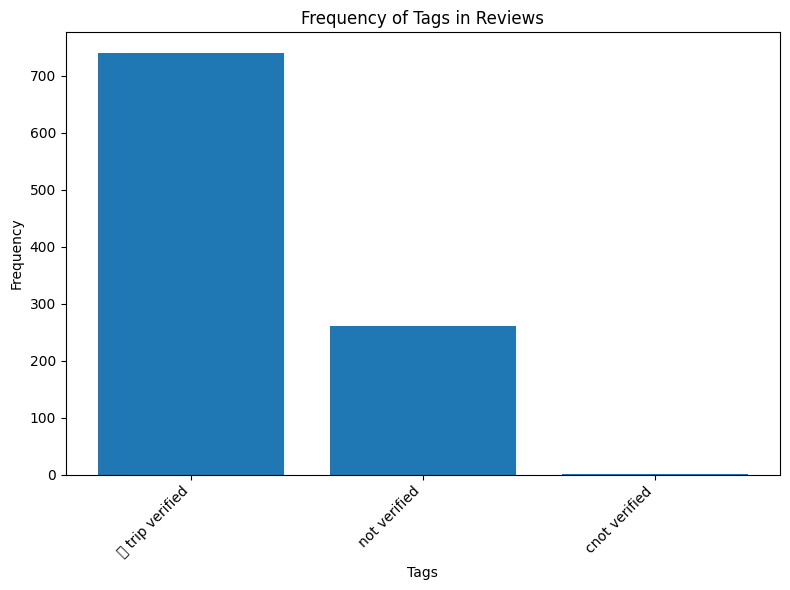

In [ ]:
tag_counts = data['tag'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(tag_counts.index, tag_counts.values)
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.title("Frequency of Tags in Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from textblob import TextBlob

data['review'] = data['review'].astype(str)

data['sentiment'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

sentiments = []

for review in reviews:
    blob = TextBlob(review)
    sentiment = blob.sentiment
    sentiment_data = {
        'Review': review,
        'Polarity': sentiment.polarity,
        'Subjectivity': sentiment.subjectivity,
        'Sentiment': "Positive" if sentiment.polarity > 0 else "Negative" if sentiment.polarity < 0 else "Neutral"
    }
    sentiments.append(sentiment_data)

snt = pd.DataFrame(sentiments)

print(snt)

                                                Review  Polarity  \
0    ✅ Trip Verified |   London Heathrow to Male In...  0.300758   
1    Not Verified |  Very good flight following an ...  0.344286   
2    Not Verified |  An hour's delay due to late ar...  0.122222   
3    ✅ Trip Verified |   I booked through BA becaus...  0.078906   
4    ✅ Trip Verified |   British airways lost bags ... -0.066667   
..                                                 ...       ...   
995  ✅ Trip Verified |  London to Shanghai. The Con...  0.459464   
996  Not Verified |  I have often flown British Air...  0.016667   
997  Not Verified |  Good morning. I would like to ...  0.188434   
998  ✅ Trip Verified | My flight was cancelled 3 da...  0.001852   
999  ✅ Trip Verified |  Hong Kong to Copenhagen via... -0.144674   

     Subjectivity Sentiment  
0        0.516970  Positive  
1        0.525714  Positive  
2        0.711111  Positive  
3        0.406250  Positive  
4        0.066667  Negative  
.. 

In [ ]:
snt

,Review,Polarity,Subjectivity,Sentiment
0,✅ Trip Verified | London Heathrow to Male In...,0.300758,0.516970,Positive
1,Not Verified | Very good flight following an ...,0.344286,0.525714,Positive
2,Not Verified | An hour's delay due to late ar...,0.122222,0.711111,Positive
3,✅ Trip Verified | I booked through BA becaus...,0.078906,0.406250,Positive
4,✅ Trip Verified | British airways lost bags ...,-0.066667,0.066667,Negative
...,...,...,...,...
995,✅ Trip Verified | London to Shanghai. The Con...,0.459464,0.630357,Positive
996,Not Verified | I have often flown British Air...,0.016667,0.605357,Positive
997,Not Verified | Good morning. I would like to ...,0.188434,0.416778,Positive
998,✅ Trip Verified | My flight was cancelled 3 da...,0.001852,0.631481,Positive


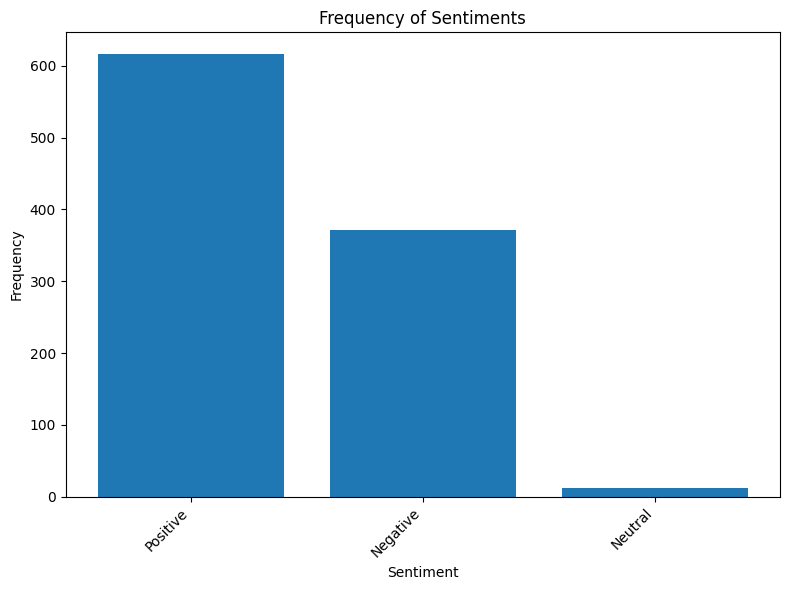

In [ ]:
sentiment_type = snt['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sentiment_type.index, sentiment_type.values)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Frequency of Sentiments")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
snt['Sentiment'].value_counts()

,count
Sentiment,
Positive,616
Negative,372
Neutral,12
